In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from numpy.linalg import inv

Here we discuss the concept of locally weighted regression where a model is generated for each query point $x_q$ depending on closer neighbors. 

### Generating the data 

In [11]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

#points 
X = diabetes_X[0:50]

# target values 
y = diabetes.target[0:50]


### Plot the data 

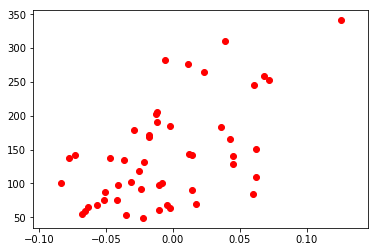

In [12]:
plt.scatter(X, y,  color='red')
plt.show()

### Insert a column of 1's for the biases 

In [13]:
X=np.insert(X, 0, values=1.0, axis=1)

### Loss function 

$$\epsilon(\theta) = \sum_{i=1}^m \omega_i (y^{(i)}-x^{(i)}\theta^T)^2 $$

This can be vectorized as 

$$\epsilon(\theta) = \left(Wy-WX\theta \right)^T \left(y-X\theta\right)$$

This can be expanded to 

$$\epsilon(\theta) = y^TWy-\theta^TX^TWy-y^TWX\theta +\theta^TX^TWX\theta$$

Take the partial derivative 

$$\frac{ \partial \epsilon}{\partial \theta} =-2X^TWy+2X^TWX\theta$$

By equating to zero we deduce 

$$\theta = \left( X^TWX\right)^{-1} X^TWy$$


### Similarity of query point and training point 

We choose the weights as 

$$\omega_i = \exp \left(-(x_i-x_q)^T {\sum}^{-1} (x_i-x_q)\right)$$

### Initialize the initial values of the weights $\omega$

In [14]:
sig = 0.5
cov = np.identity(X.shape[1])*sig**2

### Retrieve the weights matrix of each query point 

In [15]:
def get_Weight(xq):
    m = X.shape[0]
    W = np.zeros((m,m))
    for i in range(0,m):
        W[i,i] = np.exp(-0.5*((X[i]-xq).T).dot(inv(cov)).dot((X[i]-xq)))  
    return W

### Predicting a new query point 

Note that we need to keep the whole training set in the memory to retrieve the prediction of a point. Also there is no parameters for the model hence called non-parametric. 

In [19]:
def predict(Xte):
    m = Xte.shape[0]
    yhat = np.zeros(m)
    for i in range(0,Xte.shape[0]):
        W = get_Weight(Xte[i])
        yi = inv((X.T).dot(W).dot(X)).dot(X.T).dot(W).dot(y)
        yhat[i] = Xte[i].dot(yi)
    return yhat

In [20]:
yhat = predict(X)

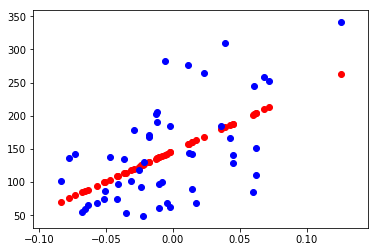

In [21]:
plt.scatter(X[:,1], yhat,  color='red')
plt.scatter(X[:,1], y,  color='blue')
plt.show()